<a href="https://colab.research.google.com/github/yucucan/DSA-210-Term-Project/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preperation

In [2]:
from os.path import join
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for file I/O
path_prefix = "/content/drive/My Drive/Colab/DSA 210/Project/Data"

Mounted at /content/drive


In [3]:
import os
print(len(os.listdir(path_prefix)))  # path_prefix as you provided

56


In [4]:
worldbank_fname_list_csv = os.listdir(path_prefix)
worldbank_fname_list = [item[:-4] if item.endswith(".csv") else item for item in  os.listdir(path_prefix)]

exceptions_2015 = ["Renewable electricity output (% of total electricity output).csv",]
exceptions_2014 = ["Electric power consumption (kWh per capita).csv"]
len(worldbank_fname_list_csv), len(worldbank_fname_list)

(56, 56)

In [5]:
n = os.listdir(path_prefix)
for item in n:
  if item not in worldbank_fname_list_csv:
    print(item)

In [6]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [7]:
### Basic libraries
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# Data Preprocessing
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Gathering Data

In [8]:
!kaggle datasets download -d mathurinache/world-happiness-report

!unzip "world-happiness-report.zip"

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [9]:
!kaggle datasets download -d azathoth42/myanimelist

!unzip "myanimelist.zip"

Dataset URL: https://www.kaggle.com/datasets/azathoth42/myanimelist
License(s): DbCL-1.0
Archive:  myanimelist.zip
  inflating: AnimeList.csv           
  inflating: UserAnimeList.csv       
  inflating: UserList.csv            
  inflating: anime_cleaned.csv       
  inflating: anime_filtered.csv      
  inflating: animelists_cleaned.csv  
  inflating: animelists_filtered.csv  
  inflating: users_cleaned.csv       
  inflating: users_filtered.csv      


# Data Preprocessing

In [10]:
df = pd.read_csv('2020.csv')
df["Country"] = df["Country name"]
df.drop(columns=["Country name"], inplace=True)
df.sort_values(by='Country', ascending=True, inplace=True)
df = df[df["Country"] != "Kosovo"]
df["Happiness Score"] = df["Ladder score"]
df.drop(columns=["Ladder score"], inplace=True)
df.reset_index(drop=True, inplace=True)
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()
df

Regional indicator  Standard error of ladder score  \
0                            South Asia                        0.031311   
1            Central and Eastern Europe                        0.056116   
2          Middle East and North Africa                        0.044236   
3           Latin America and Caribbean                        0.053442   
4    Commonwealth of Independent States                        0.058595   
..                                  ...                             ...   
147         Latin America and Caribbean                        0.064281   
148                      Southeast Asia                        0.033801   
149        Middle East and North Africa                        0.054158   
150                  Sub-Saharan Africa                        0.060677   
151                  Sub-Saharan Africa                        0.058674   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0        2.628270      2.505530               7.462861        0.470367   
1        4.992687      4.772713               9.417931        0.671070   
2        5.091802      4.918397               9.537965        0.803385   
3        6.079446      5.869954               9.810955        0.900568   
4        4.791646      4.561953               9.100476        0.757479   
..            ...           ...                    ...             ...   
147      5.179190      4.927210               8.977794        0.890408   
148      5.419749      5.287251               8.809546        0.849987   
149      3.633550      3.421250               7.759683        0.817981   
150      3.878326      3.640474               8.224720        0.698824   
151      3.414202      3.184198               7.865712        0.763093   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                  52.590000                      0.396573   -0.096429   
1                  68.708138                      0.781994   -0.042309   
2                  65.905174                      0.466611   -0.121105   
3                  68.803802                      0.831132   -0.194914   
4                  66.750656                      0.712018   -0.138780   
..                       ...                           ...         ...   
147                66.505341                      0.623278   -0.169091   
148                67.952736                      0.939593   -0.094533   
149                56.727283                      0.599920   -0.157735   
150                55.299377                      0.806500    0.078037   
151                55.617260                      0.711458   -0.072064   

     Perceptions of corruption  Ladder score in Dystopia  \
0                     0.933687                  1.972317   
1                     0.896304                  1.972317   
2                     0.735485                  1.972317   
3                     0.842010                  1.972317   
4                     0.773545                  1.972317   
..                         ...                       ...   
147                   0.837038                  1.972317   
148                   0.796421                  1.972317   
149                   0.800288                  1.972317   
150                   0.801290                  1.972317   
151                   0.810237                  1.972317   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                            0.300706                      0.356434   
1                            0.906653                      0.830484   
2                            0.943856                      1.143004   
3                            1.028466                      1.372544   
4                            0.808262                      1.034577   
..                                ...                           ...   
147                          0.770239                      1.348547   
148                          0.718092                

In [11]:
rows_to_skip = 4
for i in range (len(worldbank_fname_list_csv)):
  fname = worldbank_fname_list_csv[i]
  df_world_bank = pd.read_csv(join(path_prefix, fname), skiprows=rows_to_skip, sep=',', on_bad_lines='skip')

  if 'Country Name' in df_world_bank.columns:
    df_world_bank['Country Name'] = df_world_bank['Country Name'].str.lower().str.strip()
  else:
    print(f"Warning: 'Country Name' column not found in {fname}")
    continue

  df_tmp = df[['Country']].copy()
  if fname in exceptions_2015:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2015']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2015']
  elif fname in exceptions_2014:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2014']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2014']
  else:
    df_tmp = df_tmp.merge(df_world_bank[['Country Name', '2020']], left_on='Country', right_on='Country Name', how='left')
    df[worldbank_fname_list[i]] = df_tmp['2020']
df

Regional indicator  Standard error of ladder score  \
0                            South Asia                        0.031311   
1            Central and Eastern Europe                        0.056116   
2          Middle East and North Africa                        0.044236   
3           Latin America and Caribbean                        0.053442   
4    Commonwealth of Independent States                        0.058595   
..                                  ...                             ...   
147         Latin America and Caribbean                        0.064281   
148                      Southeast Asia                        0.033801   
149        Middle East and North Africa                        0.054158   
150                  Sub-Saharan Africa                        0.060677   
151                  Sub-Saharan Africa                        0.058674   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0        2.628270      2.505530               7.462861        0.470367   
1        4.992687      4.772713               9.417931        0.671070   
2        5.091802      4.918397               9.537965        0.803385   
3        6.079446      5.869954               9.810955        0.900568   
4        4.791646      4.561953               9.100476        0.757479   
..            ...           ...                    ...             ...   
147      5.179190      4.927210               8.977794        0.890408   
148      5.419749      5.287251               8.809546        0.849987   
149      3.633550      3.421250               7.759683        0.817981   
150      3.878326      3.640474               8.224720        0.698824   
151      3.414202      3.184198               7.865712        0.763093   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                  52.590000                      0.396573   -0.096429   
1                  68.708138                      0.781994   -0.042309   
2                  65.905174                      0.466611   -0.121105   
3                  68.803802                      0.831132   -0.194914   
4                  66.750656                      0.712018   -0.138780   
..                       ...                           ...         ...   
147                66.505341                      0.623278   -0.169091   
148                67.952736                      0.939593   -0.094533   
149                56.727283                      0.599920   -0.157735   
150                55.299377                      0.806500    0.078037   
151                55.617260                      0.711458   -0.072064   

     Perceptions of corruption  ...  \
0                     0.933687  ...   
1                     0.896304  ...   
2                     0.735485  ...   
3                     0.842010  ...   
4                     0.773545  ...   
..                         ...  ...   
147                   0.837038  ...   
148                   0.796421  ...   
149                   0.800288  ...   
150                   0.801290  ...   
151                   0.810237  ...   

     Contraceptive prevalence, any method (% of married women ages 15-49)  \
0                                                  NaN                      
1                                                  NaN                      
2                                                  NaN                      
3                                                 70.1                      
4                                                  NaN                      
..                                                 ...                      
147                                                NaN                      
148                                                NaN                      
149                                                NaN                      
150                                                NaN                      
151                       

In [12]:
df_world_bank.head(5)

SA_0000001747  \
0  SA_0000001747   
1  SA_0000001747   
2  SA_0000001747   
3  SA_0000001747   
4  SA_0000001747   

  Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol), three-year average  \
0  Alcohol, recorded per capita (15+) consumption...                                               
1  Alcohol, recorded per capita (15+) consumption...                                               
2  Alcohol, recorded per capita (15+) consumption...                                               
3  Alcohol, recorded per capita (15+) consumption...                                               
4  Alcohol, recorded per capita (15+) consumption...                                               

   numeric  EMR  Eastern Mediterranean  Country  SOM      Somalia  Year  2020  \
0  numeric  EMR  Eastern Mediterranean  Country  AFG  Afghanistan  Year  2020   
1  numeric  EMR  Eastern Mediterranean  Country  LBY        Libya  Year  2020   
2  numeric  EMR  Eastern Mediterranean  Country  SDN        Sudan  Year  2020   
3  numeric  EMR  Eastern Mediterranean  Country  PAK     Pakistan  Year  2020   
4  numeric  EMR  Eastern Mediterranean  Country  YEM        Yemen  Year  2020   

   ...  Unnamed: 24  Unnamed: 25  0.1  Unnamed: 27    0.2  0.0 [0.0 - 0.0]  \
0  ...          NaN          NaN  0.0          NaN  0.087  0.0 [0.0 - 0.1]   
1  ...          NaN          NaN  0.0          NaN  0.096  0.0 [0.0 - 0.1]   
2  ...          NaN          NaN  0.0          NaN  0.078  0.0 [0.0 - 0.1]   
3  ...          NaN          NaN  0.0          NaN  0.240  0.0 [0.0 - 0.2]   
4  ...          NaN          NaN  0.0          NaN  0.180  0.0 [0.0 - 0.2]   

   Unnamed: 30  Data is for 2020 only; it is not a three-year average.  EN  \
0          NaN  Data is for 2020 only; it is not a three-year ...       EN   
1          NaN  Data is for 2020 only; it is not a three-year ...       EN   
2          NaN  Data is for 2020 only; it is not a three-year ...       EN   
3          NaN  Data is for 2020 only; it is not a three-year ...       EN   
4          NaN  Data is for 2020 only; it is not a three-year ...       EN   

   2024-06-20T21:00:00.000Z  
0  2024-06-20T21:00:00.000Z  
1  2024-06-20T21:00:00.000Z  
2  2024-06-20T21:00:00.000Z  
3  2024-06-20T21:00:00.000Z  
4  2024-06-20T21:00:00.000Z  

[5 rows x 34 columns]

In [13]:
for col in df.columns:
    if df[col].isnull().any():
        nan_sum = df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")
        if nan_sum > 50:
          df.drop(columns=[col], inplace=True)
          print(f"Column '{col}' has been dropped.")

Column 'High-technology exports (current US$)' has 35 NaN values.
Column 'Forest area (% of land area)' has 22 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 34 NaN values.
Column 'GDP per capita growth (annual %)' has 23 NaN values.
Column 'Urban population (% of total population)' has 22 NaN values.
Column 'Net migration' has 22 NaN values.
Column 'GNI per capita, PPP (current international $)' has 23 NaN values.
Column 'Exports of goods and services (% of GDP)' has 29 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 23 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has 124 NaN values.
Column 'Literacy rate, adult total (% of people ages 15 and above)' has been dropped.
Column 'Access to electricity (% of population)' has 22 NaN values.
Column 'Population growth (annual %)' has 22 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 22 NaN values.
Colum

In [14]:
df

Regional indicator  Standard error of ladder score  \
0                            South Asia                        0.031311   
1            Central and Eastern Europe                        0.056116   
2          Middle East and North Africa                        0.044236   
3           Latin America and Caribbean                        0.053442   
4    Commonwealth of Independent States                        0.058595   
..                                  ...                             ...   
147         Latin America and Caribbean                        0.064281   
148                      Southeast Asia                        0.033801   
149        Middle East and North Africa                        0.054158   
150                  Sub-Saharan Africa                        0.060677   
151                  Sub-Saharan Africa                        0.058674   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0        2.628270      2.505530               7.462861        0.470367   
1        4.992687      4.772713               9.417931        0.671070   
2        5.091802      4.918397               9.537965        0.803385   
3        6.079446      5.869954               9.810955        0.900568   
4        4.791646      4.561953               9.100476        0.757479   
..            ...           ...                    ...             ...   
147      5.179190      4.927210               8.977794        0.890408   
148      5.419749      5.287251               8.809546        0.849987   
149      3.633550      3.421250               7.759683        0.817981   
150      3.878326      3.640474               8.224720        0.698824   
151      3.414202      3.184198               7.865712        0.763093   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                  52.590000                      0.396573   -0.096429   
1                  68.708138                      0.781994   -0.042309   
2                  65.905174                      0.466611   -0.121105   
3                  68.803802                      0.831132   -0.194914   
4                  66.750656                      0.712018   -0.138780   
..                       ...                           ...         ...   
147                66.505341                      0.623278   -0.169091   
148                67.952736                      0.939593   -0.094533   
149                56.727283                      0.599920   -0.157735   
150                55.299377                      0.806500    0.078037   
151                55.617260                      0.711458   -0.072064   

     Perceptions of corruption  ...  \
0                     0.933687  ...   
1                     0.896304  ...   
2                     0.735485  ...   
3                     0.842010  ...   
4                     0.773545  ...   
..                         ...  ...   
147                   0.837038  ...   
148                   0.796421  ...   
149                   0.800288  ...   
150                   0.801290  ...   
151                   0.810237  ...   

     Refugee population by country or territory of asylum  \
0                                              72278.0      
1                                                105.0      
2                                              97651.0      
3                                               3965.0      
4                                             107910.0      
..                                                 ...      
147                                                NaN      
148                                                NaN      
149                                                NaN      
150                                            66070.0      
151                                             9261.0      

     Life expectancy at birth, male (years)  \
0                                    59.866   
1                                    74.632   

In [15]:
country_list = df['Country'].tolist()

In [16]:
users = pd.read_csv('users_cleaned.csv')
users['join_date'] = pd.to_datetime(users['join_date'])
users['last_online'] = pd.to_datetime(users['last_online'])
users['birth_date'] = pd.to_datetime(users['birth_date'])
now = datetime.datetime.now()
users['age'] = (now - users['birth_date']).dt.days / 365.25
users['age'] = users['age'].astype(int)
users

username  user_id  user_watching  user_completed  user_onhold  \
0             karthiga  2255153              3              49            1   
1            Damonashu    37326             45             195           27   
2                bskai   228342             25             414            2   
3       terune_uzumaki   327311              5               5            0   
4                Bas_G  5015094             35             114            6   
...                ...      ...            ...             ...          ...   
108706          isoann   797785             14             213           11   
108707        bumcakee  1396285             13             116            5   
108708       Scarlet95  2478991              6             103           10   
108709        Torasori  3975907             22             239            0   
108710          HMicca  1289601             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  access_rank  join_date  \
0              Chennai, India  1990-04-29          NaN 2013-03-03   
1             Detroit,Michigan 1991-08-01          NaN 2008-02-13   
2              Nayarit, Mexico 1990-12-14          NaN 2009-08-31   
3            Malaysia, Kuantan 1998-08-24          NaN 2010-05-10   
4          Nijmegen, Nederland 1999-10-24          NaN 2015-11-26   
...                        ...        ...          ...        ...   
108706                 Poland: 1997-01-13          NaN 2011-10-23   
108707  nhollywood, california 1998-07-18          NaN 2012-07-14   
108708                 Belgium 1995-10-17          NaN 2013-04-24   
108709            Latvia, Riga 1998-11-18          NaN 2014-07-30   
108710     Birmingham, England 1995-08-12          NaN 2012-05-05   

               last_online  stats_mean_score  stats_rewatched  stats_episodes  \
0      2014-02-04 01:32:00              7.43              0.0            3391   
1      2017-07-10 06:52:54              6.15              6.0            4903   
2      2014-05-12 16:35:00              8.27              1.0            9701   
3      2012-10-18 19:06:00              9.70              6.0             697   
4      2018-05-10 20:53:37              7.86              0.0            1847   
...                    ...               ...              ...             ...   
108706 2018-02-25 01:20:27              8.03              2.0            3939   
108707 2017-02-14 00:30:00              8.86             24.0            2537   
108708 2016-12-18 08:41:00              7.40              1.0            2869   
108709 2018-05-24 21:34:46              8.98             47.0            4469   
108710 2012-11-15 08:10:00              8.89             11.0            3822   

        age  
0        34  
1        33  
2        34  
3        26  
4        25  
...     ...  
108706   28  
108707   26  
108708   29  
108709   26  
108710   29  

[108711 rows x 18 columns]

In [17]:
if 'access_rank' in users.columns:
    users = users.drop(columns=['access_rank'])
    print("Column 'access_rank' dropped successfully from users.")
else:
    print("Column 'access_rank' not found in users.")

if 'user_id' in users.columns:
    users = users.drop(columns=['user_id'])
    print("Column 'user_id' dropped successfully from users.")
else:
    print("Column 'user_id' not found in users.")

Column 'access_rank' dropped successfully from users.
Column 'user_id' dropped successfully from users.


In [18]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]
us_states_lower = [state.lower() for state in us_states]

In [19]:
def find_country(input):
  input = str(input)
  if input == 'nan':
    return 'Other'
  else:
    for country in country_list:
      if country in input.lower():
        return country
    for state in us_states_lower:
      if state in input.lower():
        return 'united states'
    return 'Other'

In [20]:
users['Country'] = users['location'].apply(find_country)
users

username  user_watching  user_completed  user_onhold  \
0             karthiga              3              49            1   
1            Damonashu             45             195           27   
2                bskai             25             414            2   
3       terune_uzumaki              5               5            0   
4                Bas_G             35             114            6   
...                ...            ...             ...          ...   
108706          isoann             14             213           11   
108707        bumcakee             13             116            5   
108708       Scarlet95              6             103           10   
108709        Torasori             22             239            0   
108710          HMicca             11              73            2   

        user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                  0                 0                 55.091667  Female   
1                 25                59                 82.574306    Male   
2                  5                11                159.483333    Male   
3                  0                 0                 11.394444  Female   
4                 20               175                 30.458333    Male   
...              ...               ...                       ...     ...   
108706            20               136                 64.372222    Male   
108707             9                22                 41.365972  Female   
108708             8                54                 46.827083  Female   
108709             4               176                 72.361111    Male   
108710             2                16                 64.431250  Female   

                      location birth_date  join_date         last_online  \
0              Chennai, India  1990-04-29 2013-03-03 2014-02-04 01:32:00   
1             Detroit,Michigan 1991-08-01 2008-02-13 2017-07-10 06:52:54   
2              Nayarit, Mexico 1990-12-14 2009-08-31 2014-05-12 16:35:00   
3            Malaysia, Kuantan 1998-08-24 2010-05-10 2012-10-18 19:06:00   
4          Nijmegen, Nederland 1999-10-24 2015-11-26 2018-05-10 20:53:37   
...                        ...        ...        ...                 ...   
108706                 Poland: 1997-01-13 2011-10-23 2018-02-25 01:20:27   
108707  nhollywood, california 1998-07-18 2012-07-14 2017-02-14 00:30:00   
108708                 Belgium 1995-10-17 2013-04-24 2016-12-18 08:41:00   
108709            Latvia, Riga 1998-11-18 2014-07-30 2018-05-24 21:34:46   
108710     Birmingham, England 1995-08-12 2012-05-05 2012-11-15 08:10:00   

        stats_mean_score  stats_rewatched  stats_episodes  age        Country  
0                   7.43              0.0            3391   34          india  
1                   6.15              6.0            4903   33  united states  
2                   8.27              1.0            9701   34         mexico  
3                   9.70              6.0             697   26       malaysia  
4                   7.86              0.0            1847   25          Other  
...                  ...              ...             ...  ...            ...  
108706              8.03              2.0            3939   28         poland  
108707              8.86             24.0            2537   26  united states  
108708              7.40              1.0            2869   29        belgium  
108709              8.98             47.0            4469   26         latvia  
108710              8.89             11.0            3822   29          Other  

[108711 rows x 17 columns]

In [21]:
if 'location' in users.columns:
    users = users.drop(columns=['location'])
    print("Column 'location' dropped successfully from users.")
else:
    print("Column 'location' not found in users.")

Column 'location' dropped successfully from users.


In [22]:
other_count = users[users['Country'] == 'Other'].shape[0]
print(f"Number of 'Other' values in the 'Country' column: {other_count}")

Number of 'Other' values in the 'Country' column: 40904


In [23]:
users = users[users['Country'] != 'Other']
users = users[users['user_completed'] != 0]
users = users[users['stats_mean_score'] != 0]
users = users[users['gender'].isin(['Male', 'Female'])]
users.reset_index(drop=True, inplace=True)
users

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date         last_online  stats_mean_score  \
0     1990-04-29 2013-03-03 2014-02-04 01:32:00              7.43   
1     1991-08-01 2008-02-13 2017-07-10 06:52:54              6.15   
2     1990-12-14 2009-08-31 2014-05-12 16:35:00              8.27   
3     1998-08-24 2010-05-10 2012-10-18 19:06:00              9.70   
4     1996-09-26 2013-09-08 2018-01-14 13:05:42              8.23   
...          ...        ...                 ...               ...   
65823 1993-02-14 2011-04-11 2018-04-09 18:01:39              7.41   
65824 1997-01-13 2011-10-23 2018-02-25 01:20:27              8.03   
65825 1998-07-18 2012-07-14 2017-02-14 00:30:00              8.86   
65826 1995-10-17 2013-04-24 2016-12-18 08:41:00              7.40   
65827 1998-11-18 2014-07-30 2018-05-24 21:34:46              8.98   

       stats_rewatched  stats_episodes  age        Country  
0                  0.0            3391   34          india  
1                  6.0            4903   33  united states  
2                  1.0            9701   34         mexico  
3                  6.0             697   26       malaysia  
4                  0.0            1314   28         poland  
...                ...             ...  ...            ...  
65823              6.0            7598   32         sweden  
65824              2.0            3939   28         poland  
65825             24.0            2537   26  united states  
65826              1.0            2869   29        belgium  
65827             47.0            4469   26         latvia  

[65828 rows x 16 columns]

In [24]:
final_df = pd.merge(users, df, on='Country', how='inner')
final_df

username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
65823 1993-02-14 2011-04-11  ...   
65824 1997-01-13 2011-10-23  ...   
65825 1998-07-18 2012-07-14  ...   
65826 1995-10-17 2013-04-24  ...   
65827 1998-11-18 2014-07-30  ...   

      Refugee population by country or territory of asylum  \
0                                               195373.0     
1                                               340846.0     
2                                                45434.0     
3                                               129902.0     
4                                                 2771.0     
...                                                  ...     
65823                                           248372.0     
65824                                             2771.0     
65825                                           340846.0     
65826                                            64973.0     
65827                                              637.0     

       Life expectancy at birth, male (years)  \
0                                      68.615   
1                                      74.200   
2                                      66.334   
3                                      73.648   
4                                      72.500   
...                                       ...   
65823                                  80.600   
65824                                  72.500   
65825                                  74.200   
65826                                  78.500   
65827                                  70.600   

       Life expectancy at birth, female (years)  \
0                                        71.824   
1                                        79.900   
2                                        74.314   
3                                        78.472   
4                                        80.700   
...                                         ...   
65823                                    84.200   
65824                                    80.700   
65825                                    79.900   
65826 

In [25]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'username' has 1 NaN values.
Column 'High-technology exports (current US$)' has 4748 NaN values.
Column 'Forest area (% of land area)' has 4350 NaN values.
Column 'Government expenditure on education, total (% of GDP)' has 5395 NaN values.
Column 'GDP per capita growth (annual %)' has 4350 NaN values.
Column 'Urban population (% of total population)' has 4350 NaN values.
Column 'Net migration' has 4350 NaN values.
Column 'GNI per capita, PPP (current international $)' has 4350 NaN values.
Column 'Exports of goods and services (% of GDP)' has 4419 NaN values.
Column 'Agriculture, forestry, and fishing, value added (% of GDP)' has 4350 NaN values.
Column 'Access to electricity (% of population)' has 4350 NaN values.
Column 'Population growth (annual %)' has 4350 NaN values.
Column 'Renewable electricity output (% of total electricity output)' has 4350 NaN values.
Column 'Electric power consumption (kWh per capita)' has 4381 NaN values.
Column 'Renewable internal freshwater resourc

In [26]:
if 'Government expenditure on education, total (% of GDP)' in final_df.columns:
    final_df = final_df.drop(columns=['Government expenditure on education, total (% of GDP)'])
    print("Column 'Government expenditure on education, total (% of GDP)' dropped successfully from final_df.")
else:
    print("Column 'Government expenditure on education, total (% of GDP)' not found in final_df.")

Column 'Government expenditure on education, total (% of GDP)' dropped successfully from final_df.


In [27]:
if 'High-technology exports (current US$)' in final_df.columns:
    final_df.dropna(subset=['High-technology exports (current US$)'], inplace=True)
    print("Rows with missing values in 'High-technology exports (current US$)' dropped.")
else:
    print("'High-technology exports (current US$)' column not found in the DataFrame.")

final_df

Rows with missing values in 'High-technology exports (current US$)' dropped.


username  user_watching  user_completed  user_onhold  \
0            karthiga              3              49            1   
1           Damonashu             45             195           27   
2               bskai             25             414            2   
3      terune_uzumaki              5               5            0   
4            HimeAria              2              87            2   
...               ...            ...             ...          ...   
65823       ZeroFr3aK             36             179           12   
65824          isoann             14             213           11   
65825        bumcakee             13             116            5   
65826       Scarlet95              6             103           10   
65827        Torasori             22             239            0   

       user_dropped  user_plantowatch  user_days_spent_watching  gender  \
0                 0                 0                 55.091667  Female   
1                25                59                 82.574306    Male   
2                 5                11                159.483333    Male   
3                 0                 0                 11.394444  Female   
4                 0                28                 19.963194  Female   
...             ...               ...                       ...     ...   
65823             0                38                125.084028    Male   
65824            20               136                 64.372222    Male   
65825             9                22                 41.365972  Female   
65826             8                54                 46.827083  Female   
65827             4               176                 72.361111    Male   

      birth_date  join_date  ...  \
0     1990-04-29 2013-03-03  ...   
1     1991-08-01 2008-02-13  ...   
2     1990-12-14 2009-08-31  ...   
3     1998-08-24 2010-05-10  ...   
4     1996-09-26 2013-09-08  ...   
...          ...        ...  ...   
65823 1993-02-14 2011-04-11  ...   
65824 1997-01-13 2011-10-23  ...   
65825 1998-07-18 2012-07-14  ...   
65826 1995-10-17 2013-04-24  ...   
65827 1998-11-18 2014-07-30  ...   

      Refugee population by country or territory of asylum  \
0                                               195373.0     
1                                               340846.0     
2                                                45434.0     
3                                               129902.0     
4                                                 2771.0     
...                                                  ...     
65823                                           248372.0     
65824                                             2771.0     
65825                                           340846.0     
65826                                            64973.0     
65827                                              637.0     

       Life expectancy at birth, male (years)  \
0                                      68.615   
1                                      74.200   
2                                      66.334   
3                                      73.648   
4                                      72.500   
...                                       ...   
65823                                  80.600   
65824                                  72.500   
65825                                  74.200   
65826                                  78.500   
65827                                  70.600   

       Life expectancy at birth, female (years)  \
0                                        71.824   
1                                        79.900   
2                                        74.314   
3                                        78.472   
4                                        80.700   
...                                         ...   
65823                                    84.200   
65824                                    80.700   
65825                                    79.900   
65826 

In [28]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

Column 'username' has 1 NaN values.
Column 'Exports of goods and services (% of GDP)' has 69 NaN values.
Column 'Electric power consumption (kWh per capita)' has 20 NaN values.
Column 'Renewable internal freshwater resources per capita (cubic meters)' has 14 NaN values.
Column 'Tax revenue (% of GDP)' has 2199 NaN values.
Column 'Population in the largest city (% of urban population)' has 312 NaN values.
Column 'New businesses registered (number)' has 19298 NaN values.
Column 'Refugee population by country or territory of asylum' has 783 NaN values.
Column 'Medium and high-tech exports (% manufactured exports)' has 30 NaN values.
Column 'Military expenditure (% of GDP)' has 223 NaN values.
Column 'Inflation, consumer prices (annual %)' has 553 NaN values.


In [29]:
if 'username' in final_df.columns:
    final_df.dropna(subset=['username'], inplace=True)
    print("Rows with missing values in 'username' dropped.")
else:
    print("'username' column not found in the DataFrame.")

Rows with missing values in 'username' dropped.


In [30]:
numeric_columns = final_df.select_dtypes(include=np.number).columns
final_df[numeric_columns] = final_df[numeric_columns].fillna(final_df[numeric_columns].mean())

In [31]:
for col in final_df.columns:
    if final_df[col].isnull().any():
        nan_sum = final_df[col].isnull().sum()
        print(f"Column '{col}' has {nan_sum} NaN values.")

In [33]:
if 'upperwhisker' in final_df.columns:
    final_df = final_df.drop(columns=['upperwhisker'])
    print("Column 'upperwhisker' dropped successfully from final_df.")
else:
    print("Column 'upperwhisker' not found in final_df.")

if 'lowerwhisker' in final_df.columns:
    final_df = final_df.drop(columns=['lowerwhisker'])
    print("Column 'lowerwhisker' dropped successfully from final_df.")
else:
    print("Column 'lowerwhisker' not found in final_df.")

if 'Standard error of ladder score' in final_df.columns:
    final_df = final_df.drop(columns=['Standard error of ladder score'])
    print("Column 'Standard error of ladder score' dropped successfully from final_df.")
else:
    print("Column 'Standard error of ladder score' not found in final_df.")

Column 'upperwhisker' dropped successfully from final_df.
Column 'lowerwhisker' dropped successfully from final_df.
Column 'Standard error of ladder score' dropped successfully from final_df.


In [79]:
final_df.columns

Index(['username', 'user_watching', 'user_completed', 'user_onhold',
       'user_dropped', 'user_plantowatch', 'user_days_spent_watching',
       'gender', 'birth_date', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'age', 'Country',
       'Regional indicator', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Happiness Score',
       'High-technology exports (current US$)', 'Forest area (% of land area)',
       'GDP per capita growth (annual %)',
       'Urban population (% of total population)', 'Net migration',
       'G

# Conduct Exploratory Data Analysis

In [58]:
numerical_features = ['age',
                      'stats_mean_score',
                      'Happiness Score',
                      'user_days_spent_watching',
                      'user_completed',
                      'GDP per capita (current US$)',
                      'Logged GDP per capita',
                      'Social support',
                      'Healthy life expectancy',
                      'Dystopia + residual',
                      'Freedom to make life choices',
                      'Generosity',
                      'Perceptions of corruption',
                      'user_watching',
                      'user_plantowatch']

interesting_pairs = [
    ('Happiness Score', 'Logged GDP per capita'),
    ('Happiness Score', 'Healthy life expectancy'),
    ('stats_mean_score', 'user_completed'),
    ('user_days_spent_watching', 'user_completed'),
]

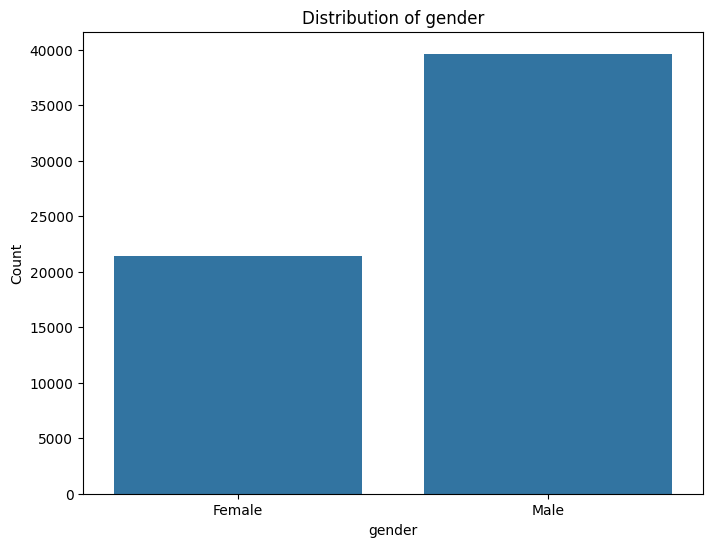

In [59]:
categorical_feature = 'gender'

plt.figure(figsize=(8, 6))
sns.countplot(x=categorical_feature, data=final_df)
plt.title(f'Distribution of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.show()

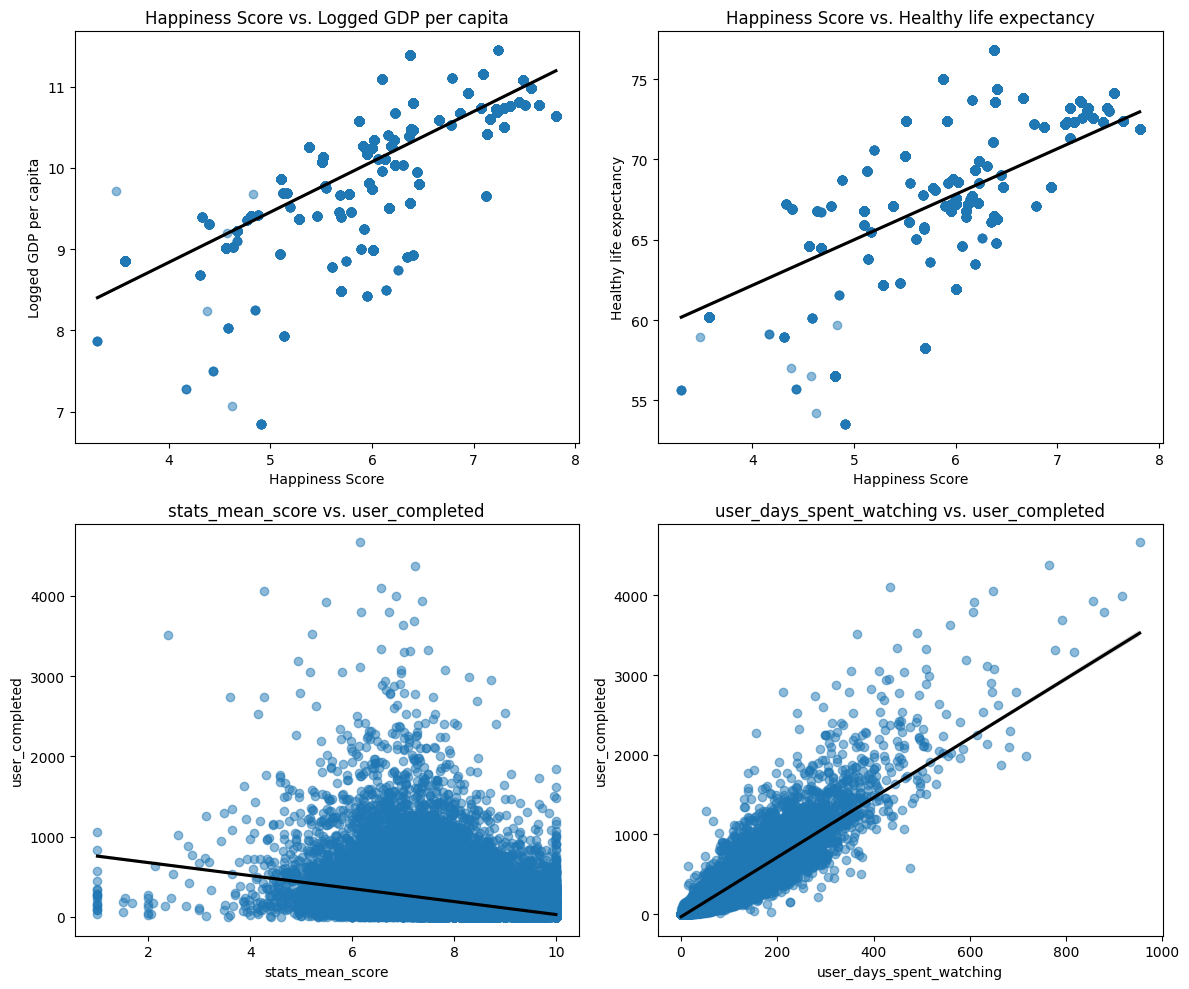

In [60]:
num_pairs = len(interesting_pairs)
num_cols = 2
num_rows = math.ceil(num_pairs / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()

for i, pair in enumerate(interesting_pairs):
    feature1, feature2 = pair
    sns.regplot(x=feature1, y=feature2, data=final_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'}, ax=axes[i])
    axes[i].set_title(f'{feature1} vs. {feature2}')

for i in range(num_pairs, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

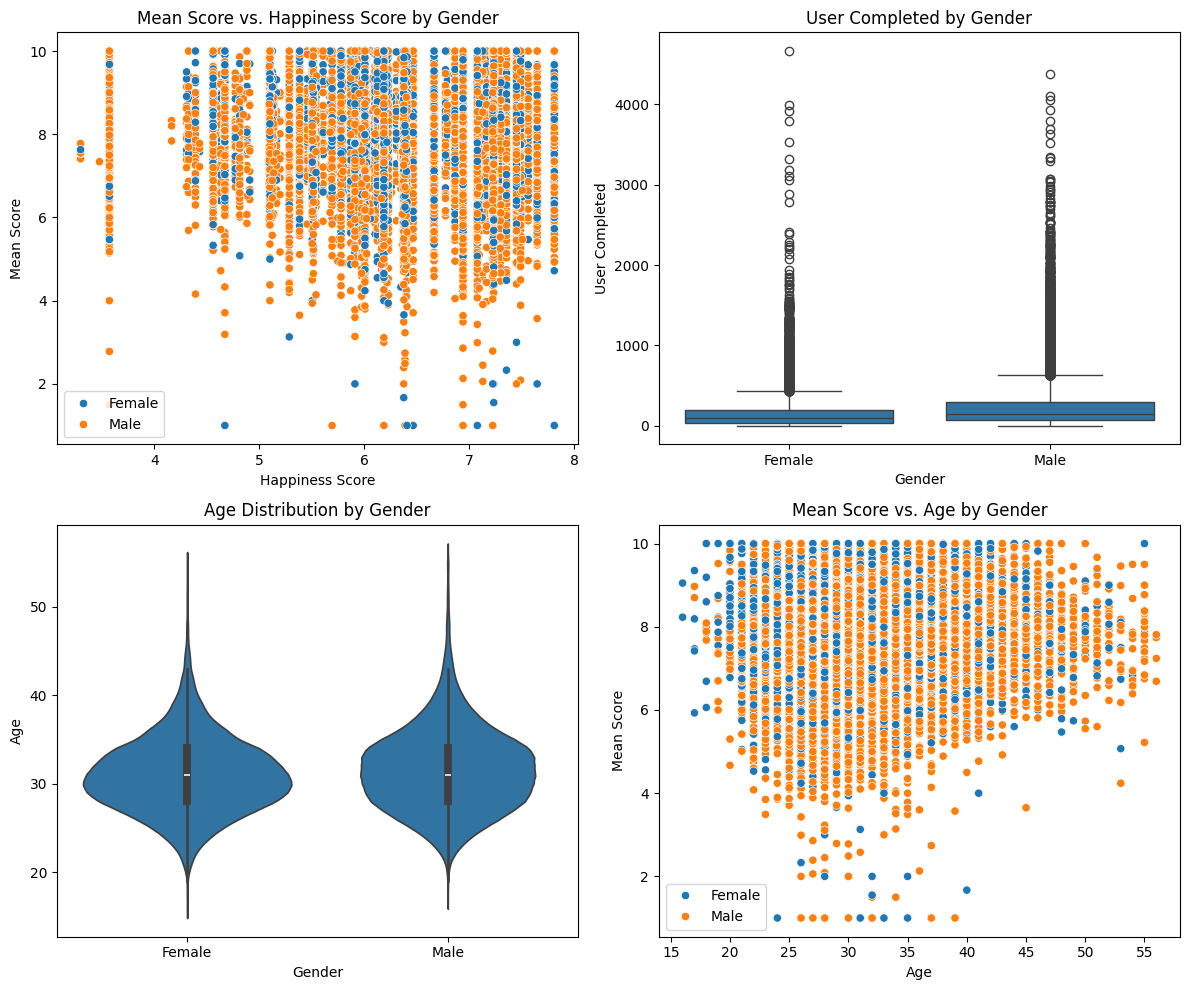

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(x='Happiness Score', y='stats_mean_score', hue='gender', data=final_df, ax=axes[0, 0])
axes[0, 0].set_title('Mean Score vs. Happiness Score by Gender')
axes[0, 0].set_xlabel('Happiness Score')
axes[0, 0].set_ylabel('Mean Score')
axes[0, 0].legend()

sns.boxplot(x='gender', y='user_completed', data=final_df, ax=axes[0, 1])
axes[0, 1].set_title('User Completed by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('User Completed')

sns.violinplot(x='gender', y='age', data=final_df, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Age')

sns.scatterplot(x='age', y='stats_mean_score', hue='gender', data=final_df, ax=axes[1, 1])
axes[1, 1].set_title('Mean Score vs. Age by Gender')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Mean Score')
axes[1, 1].legend()


plt.tight_layout()
plt.show();

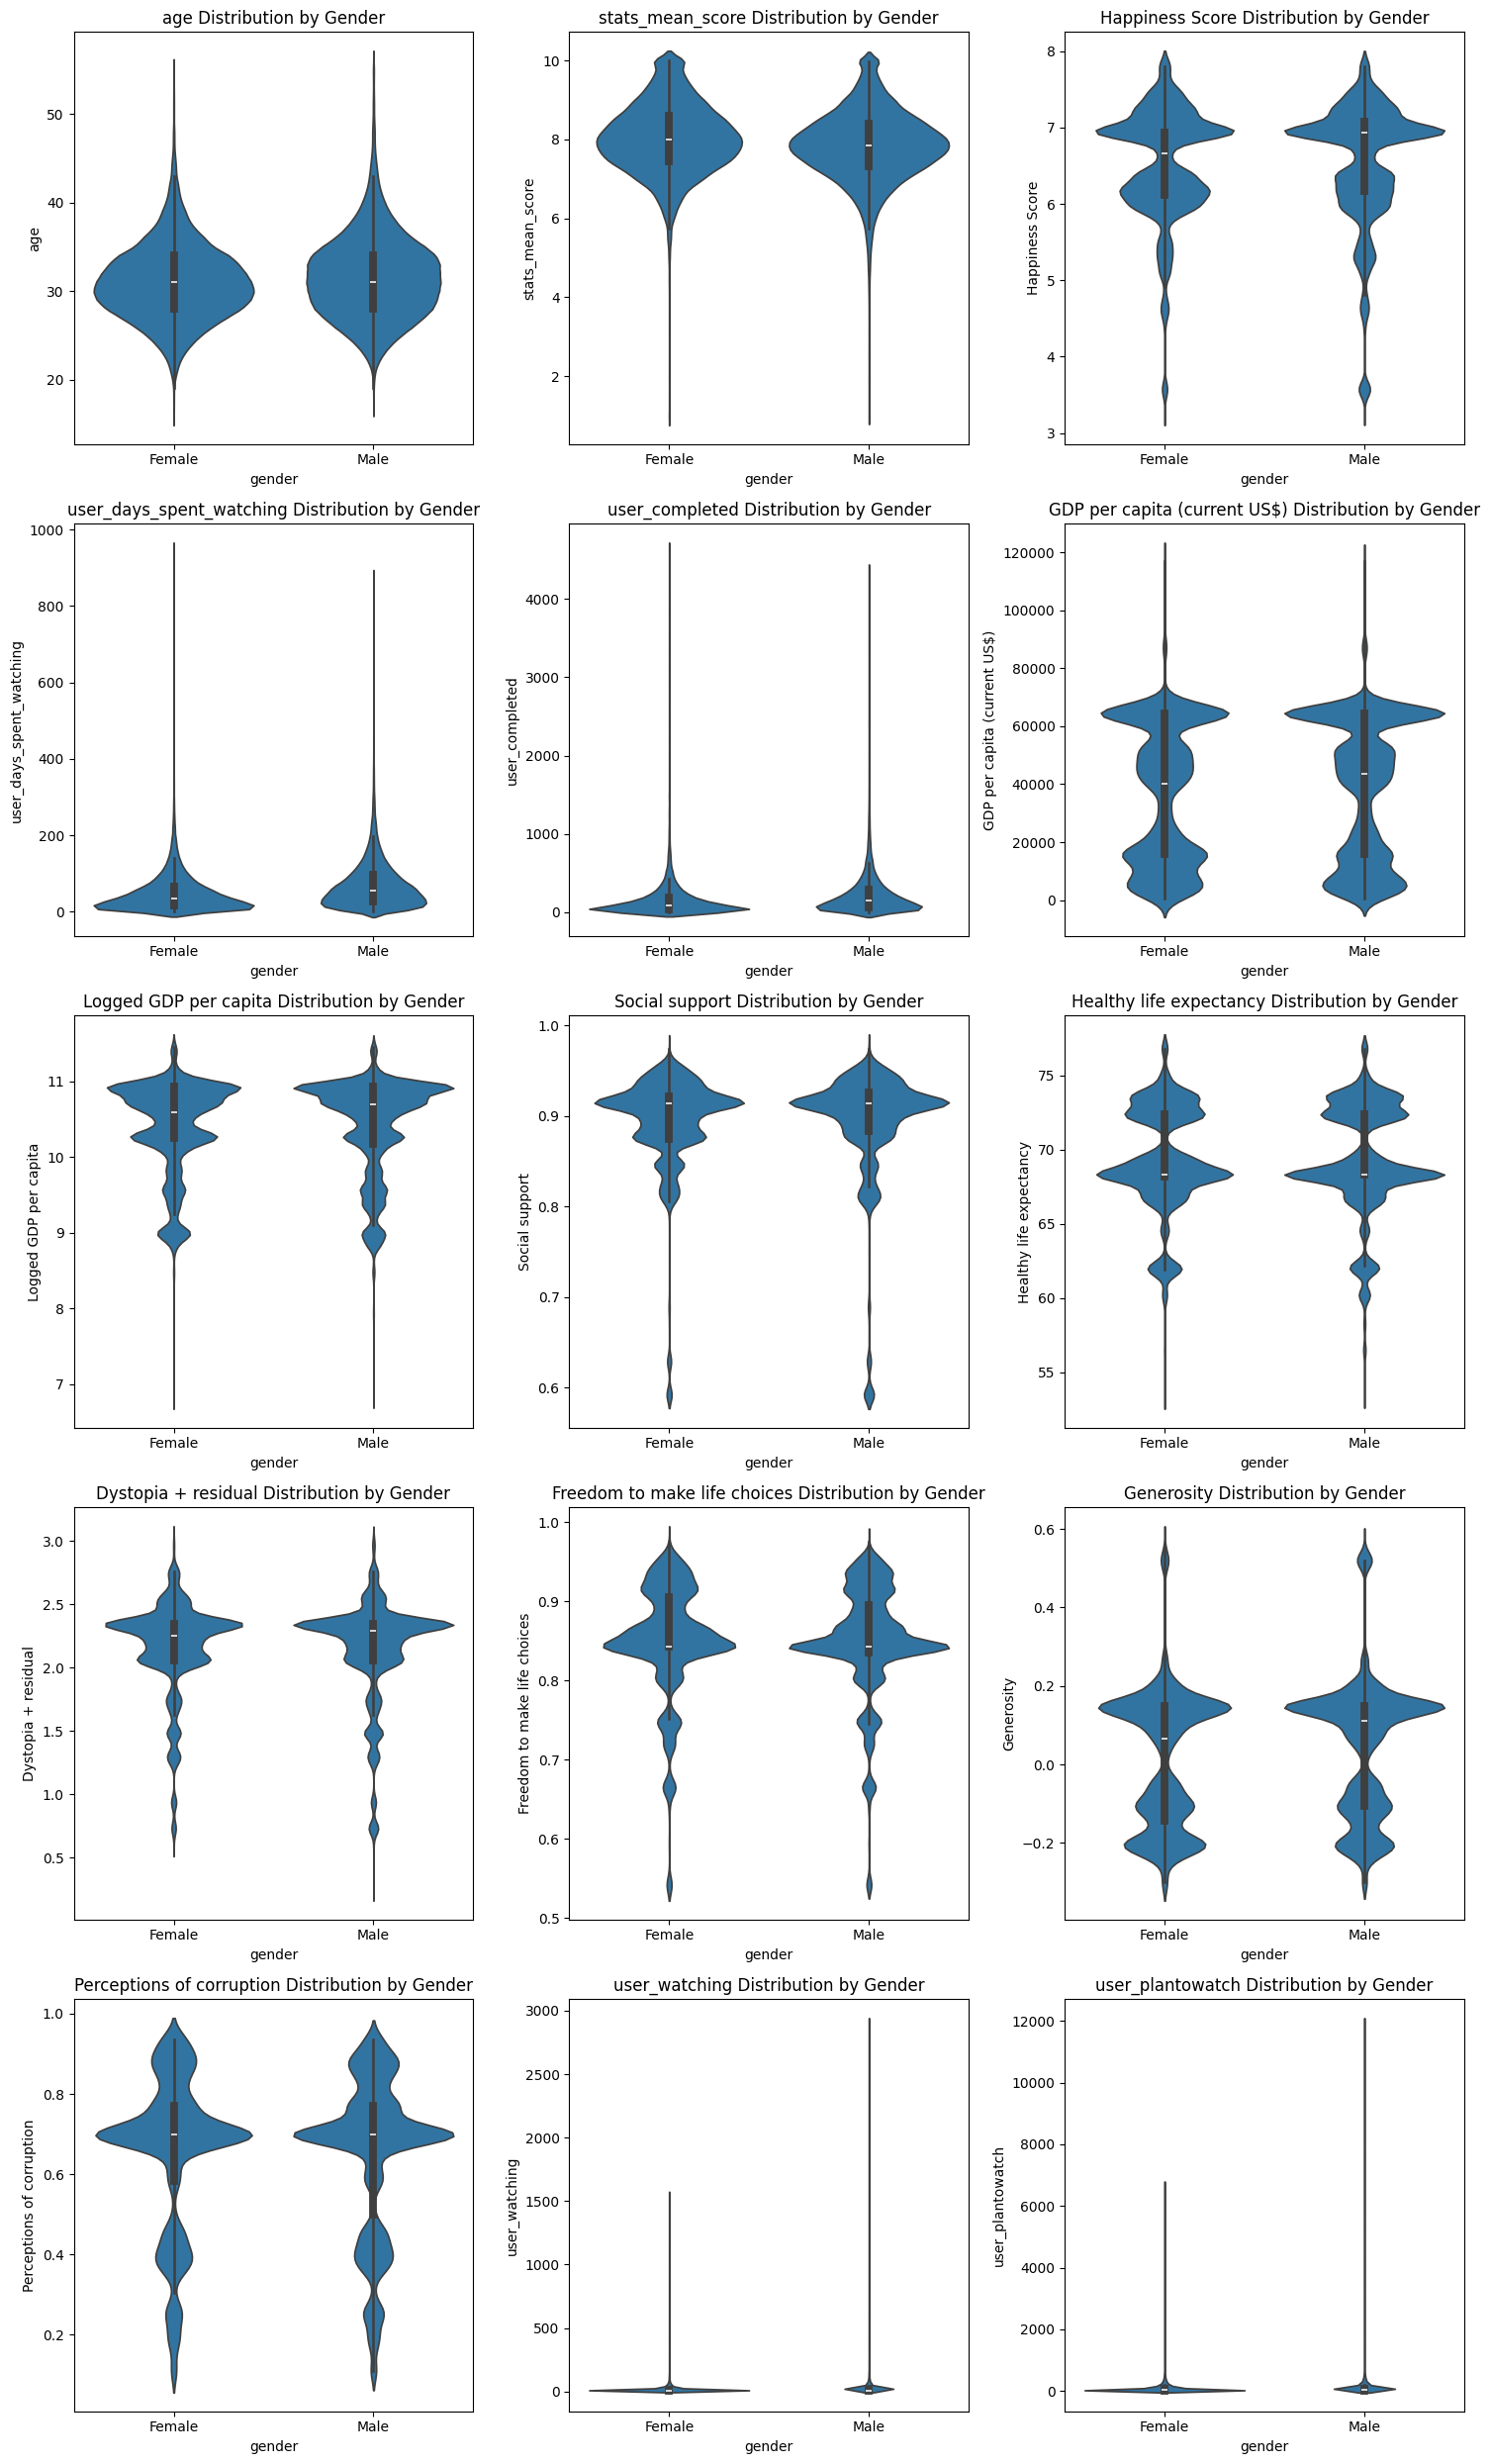

In [62]:
num_features = len(numerical_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.violinplot(x='gender', y=feature, data=final_df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Gender')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

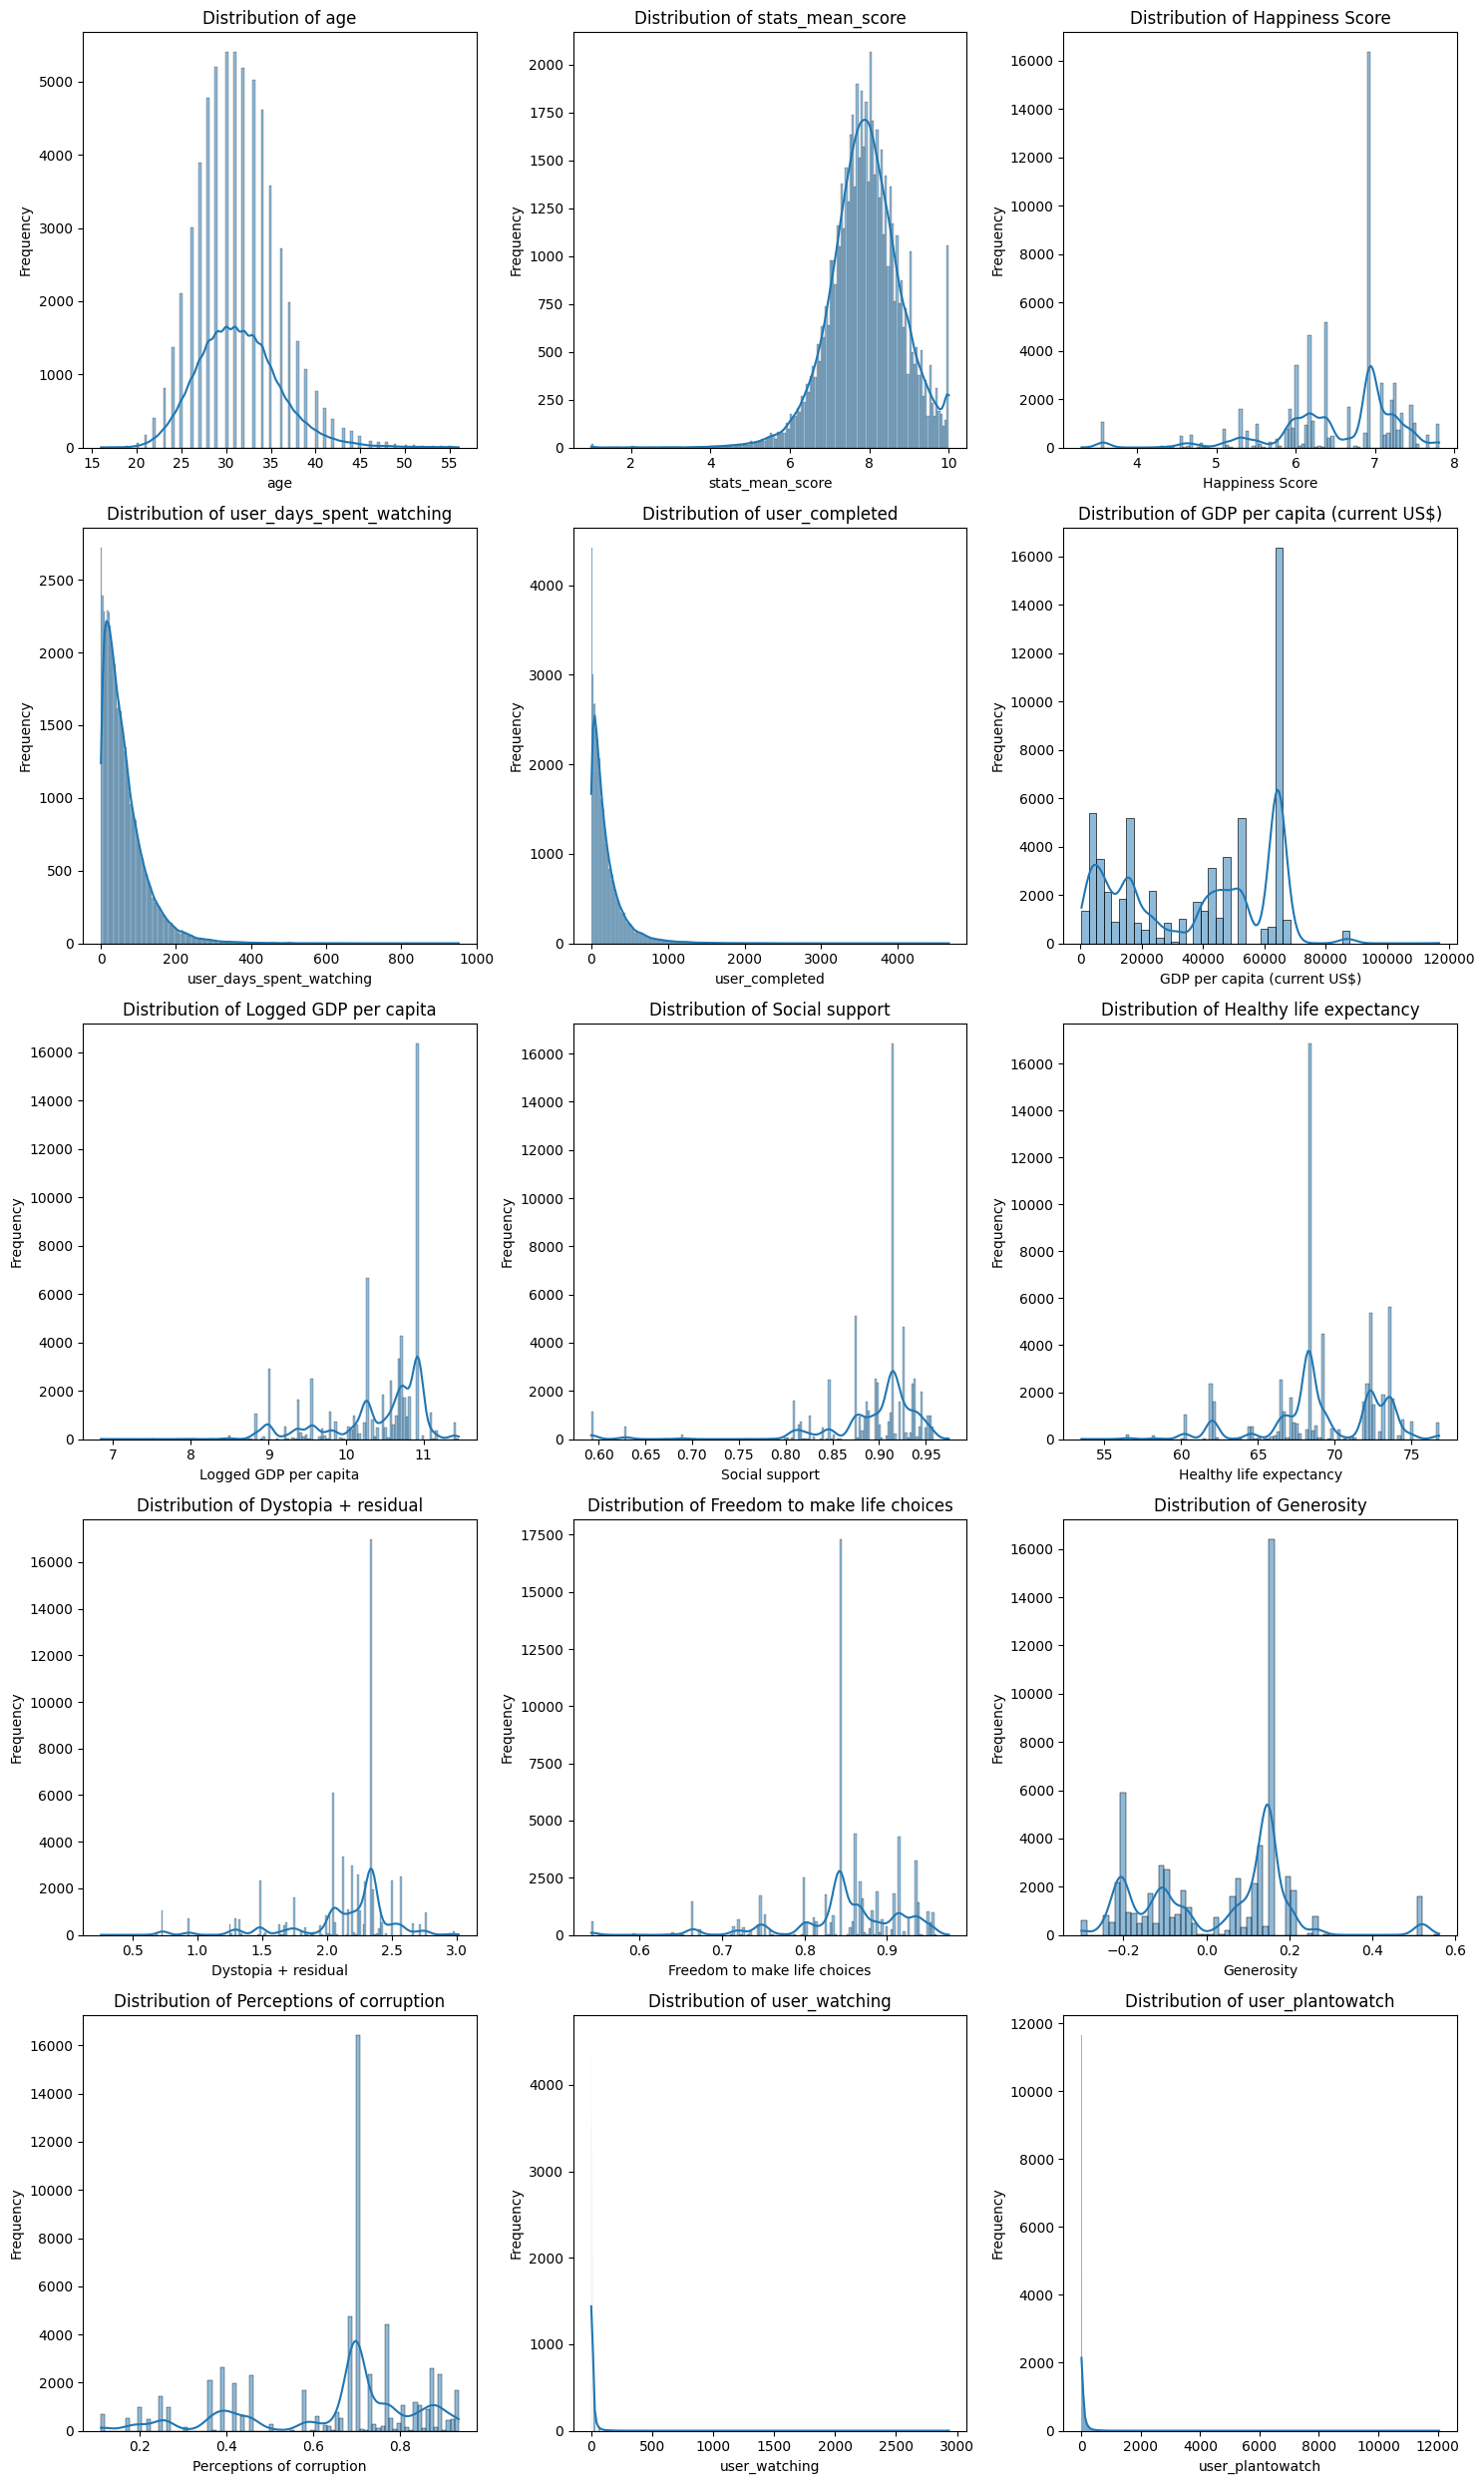

In [63]:
num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(final_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

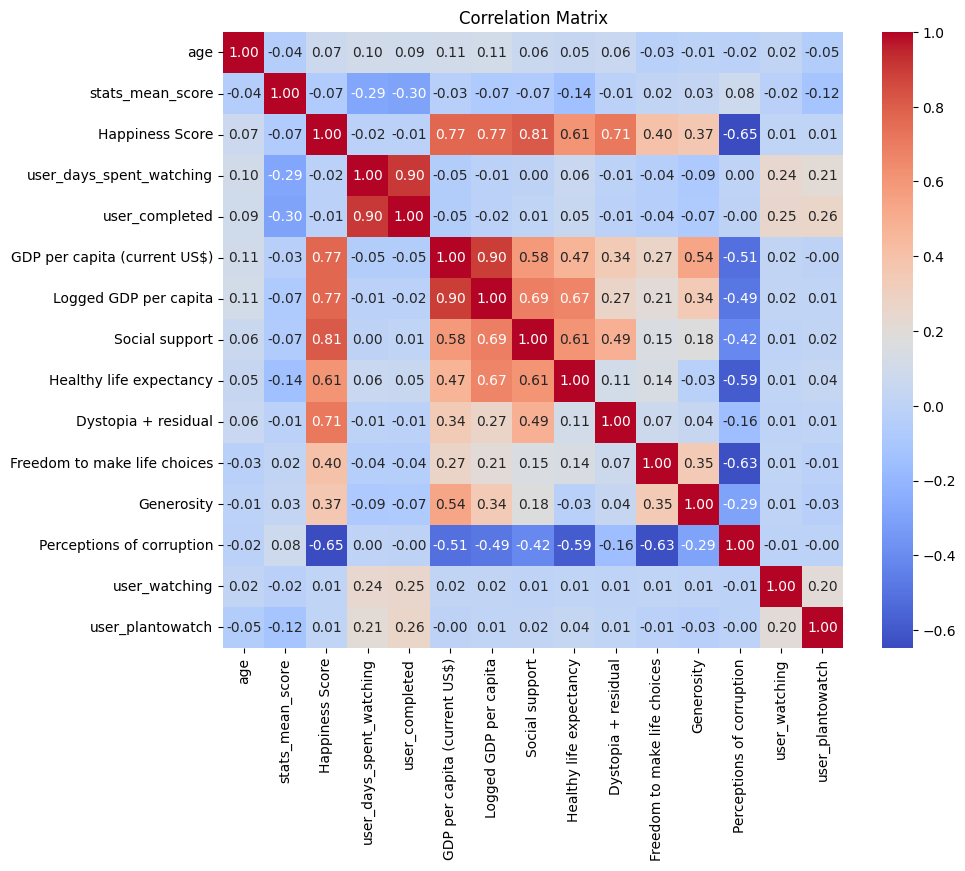

In [64]:
correlation_matrix = final_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

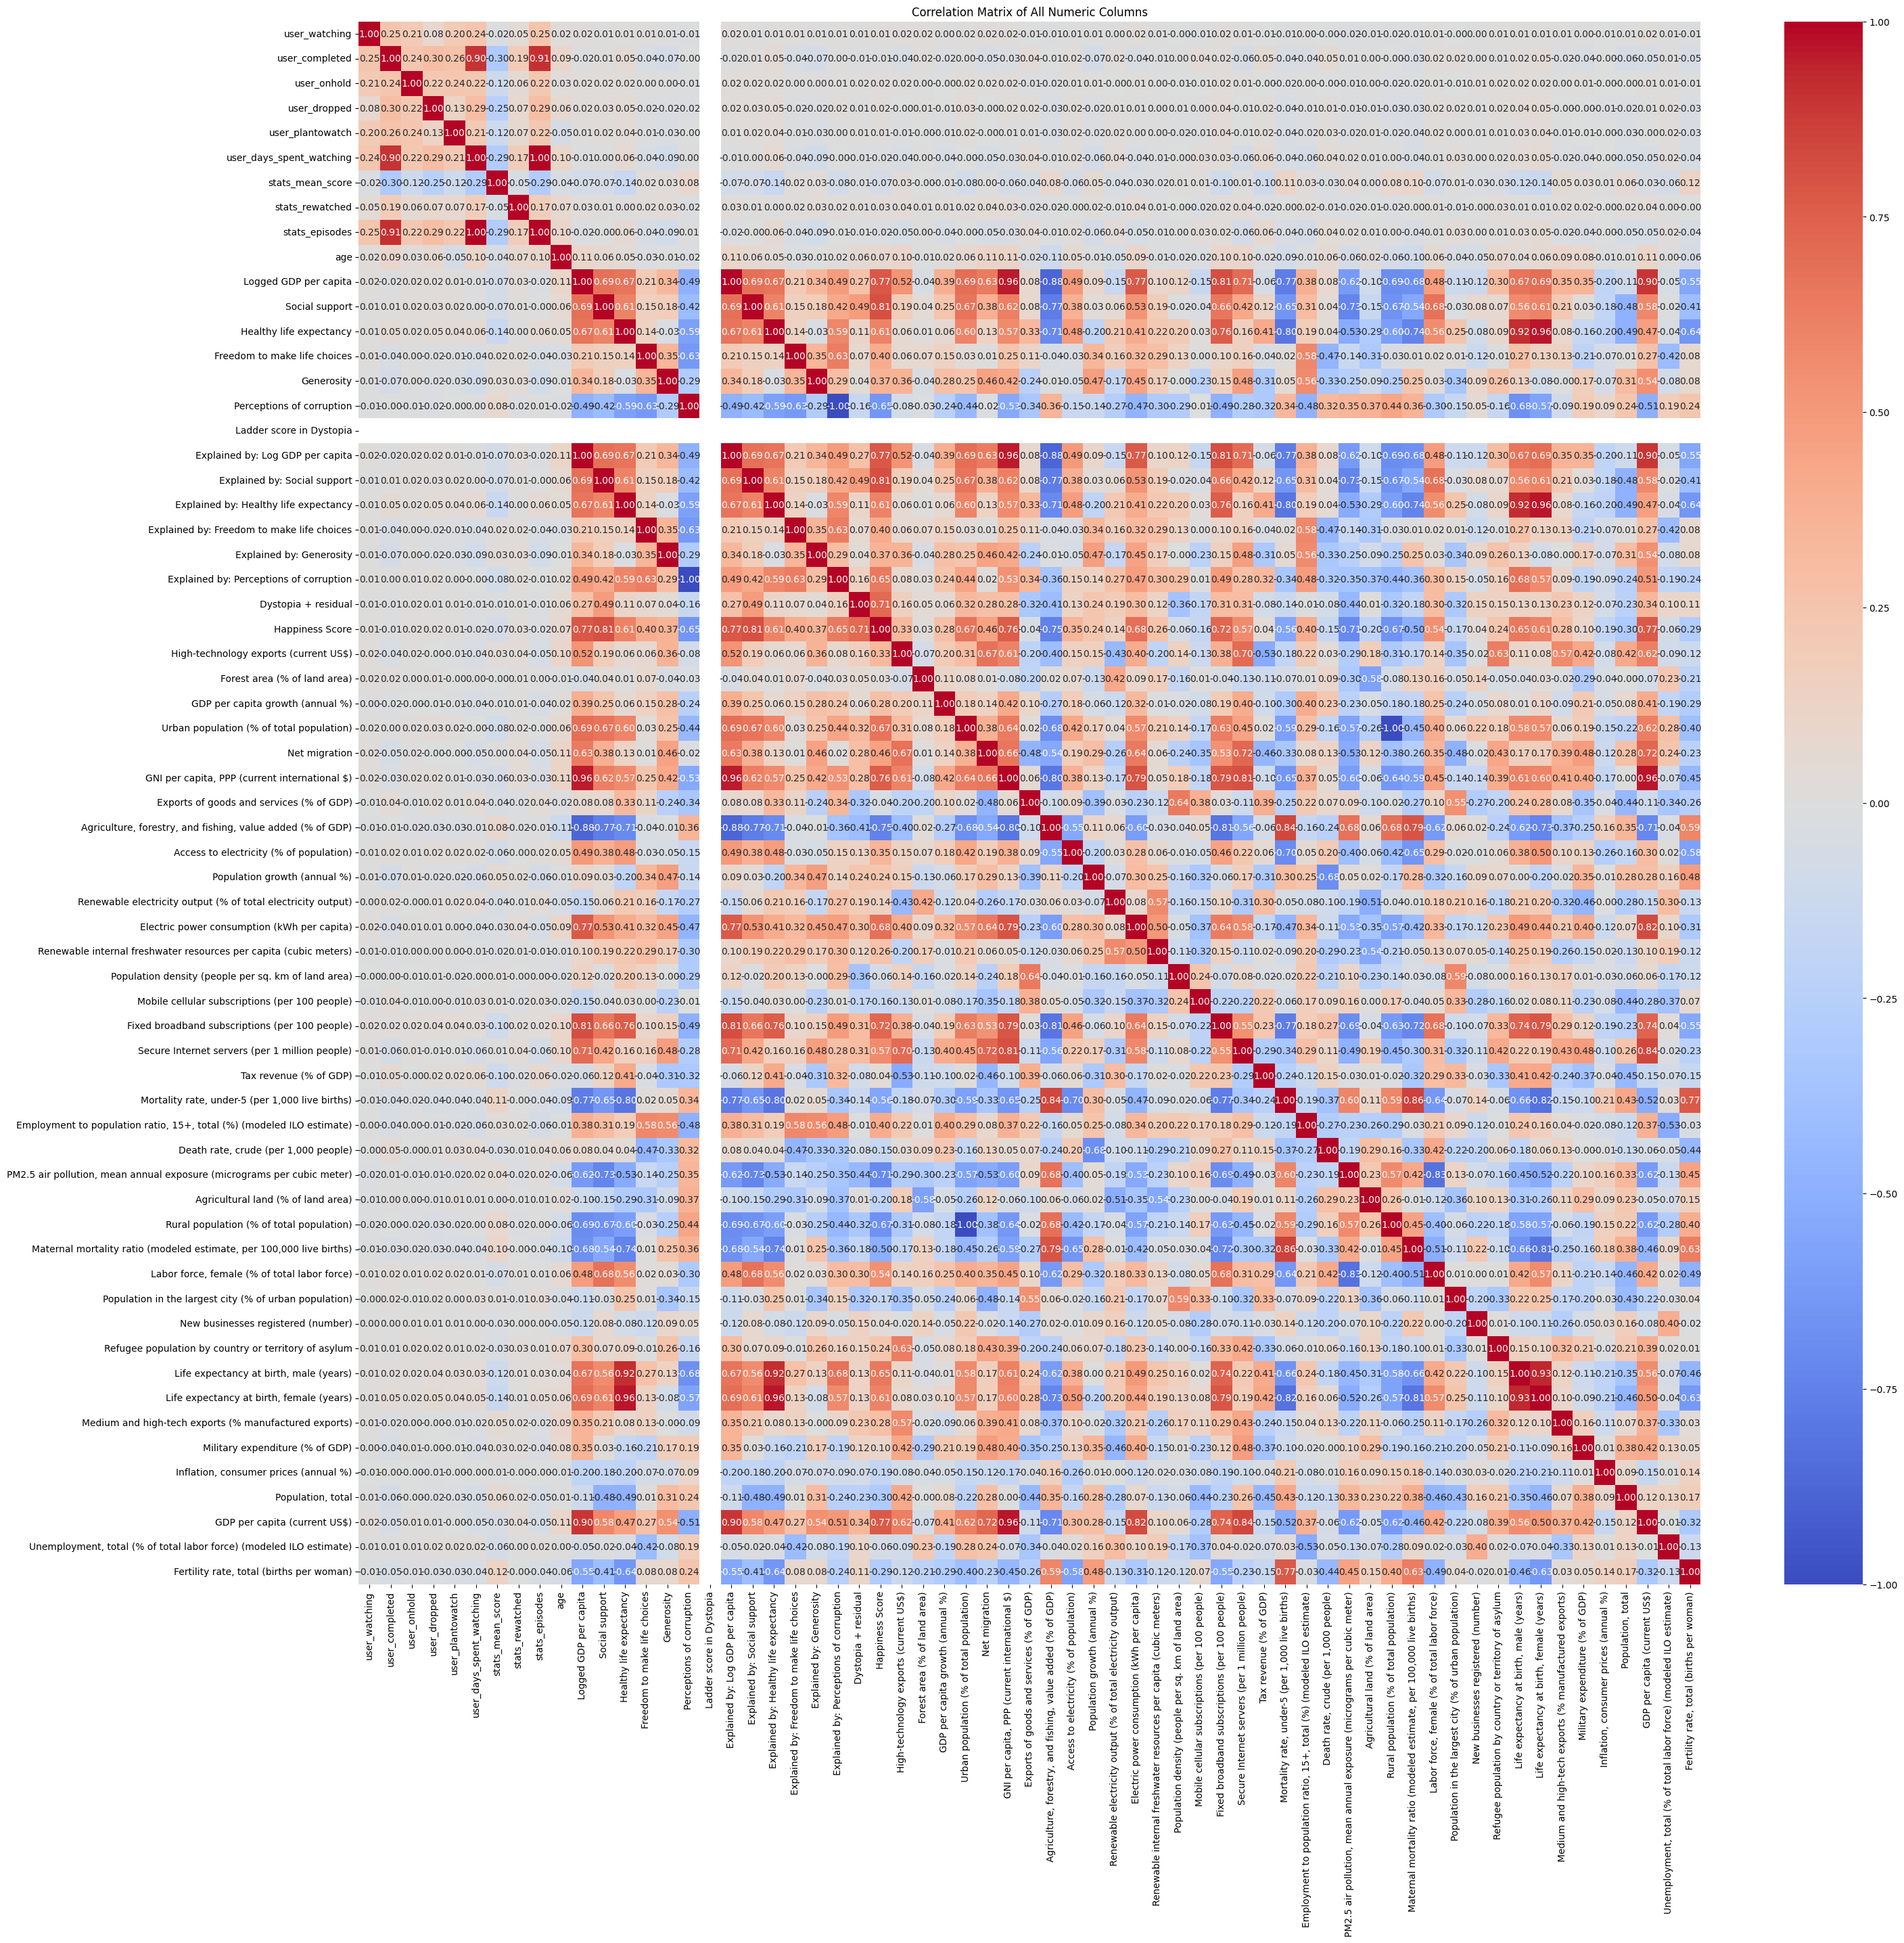

In [65]:
numeric_columns = final_df.select_dtypes(include=[np.number]).columns

correlation_matrix = final_df[numeric_columns].corr()

plt.figure(figsize=(32, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()

# Hypothesis Tests

**H1**: Users with a higher 'Mean Score' tend to have higher engagement metrics, such as a larger number of 'User Completed' anime and more 'User Days Spent Watching', suggesting satisfaction leads to deeper engagement

In [66]:
correlation_with_completed = final_df['stats_mean_score'].corr(final_df['user_completed'])
correlation_with_days_spent = final_df['stats_mean_score'].corr(final_df['user_days_spent_watching'])

print(f"Correlation between Mean Score and User Completed: {correlation_with_completed}")
print(f"Correlation between Mean Score and User Days Spent Watching: {correlation_with_days_spent}")

Correlation between Mean Score and User Completed: -0.29853736050021745
Correlation between Mean Score and User Days Spent Watching: -0.2854994525485195


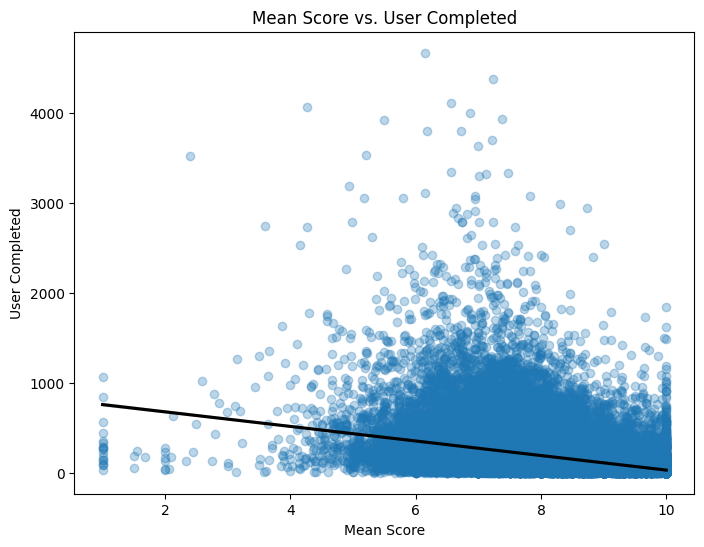

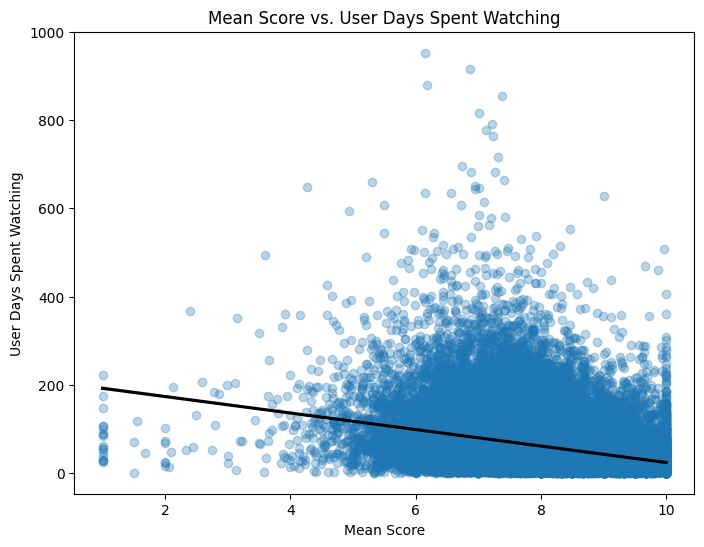

In [67]:
plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_completed', data=final_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Completed')
plt.xlabel('Mean Score')
plt.ylabel('User Completed')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='stats_mean_score', y='user_days_spent_watching', data=final_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'black'})
plt.title('Mean Score vs. User Days Spent Watching')
plt.xlabel('Mean Score')
plt.ylabel('User Days Spent Watching')
plt.show()

In [68]:
tmp = final_df.sample(n=100, random_state=42).copy()

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])
tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])
tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

In [69]:
contingency_table_completed = pd.crosstab(tmp['mean_score_category'], tmp['completed_category'])

contingency_table_days_spent = pd.crosstab(tmp['mean_score_category'], tmp['days_spent_category'])

In [70]:
chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

print(f"Chi-square test for Mean Score and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for Mean Score and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

Chi-square test for Mean Score and User Completed:
Chi-square statistic: 13.47908147216106
P-value: 0.009157350520126189

Chi-square test for Mean Score and User Days Spent Watching:
Chi-square statistic: 13.920782216629965
P-value: 0.007552225616980842


**Conclusion**: We fail to reject the null hypothesis and conclude that there is no significant association

**H2**: Users from countries with higher 'GDP per capita (current US$)' tend to watch more anime ('User Completed', 'User Watched Episodes') and potentially have higher 'Mean Scores', possibly reflecting better access or more leisure time/income.

In [71]:
correlation_with_completed = final_df['GDP per capita (current US$)'].corr(final_df['user_completed'])
correlation_with_days_spent = final_df['GDP per capita (current US$)'].corr(final_df['user_days_spent_watching'])
correlation_with_mean_score = final_df['GDP per capita (current US$)'].corr(final_df['stats_mean_score'])

print(f"Correlation between GDP per capita and User Completed: {correlation_with_completed}")
print(f"Correlation between GDP per capita and User Days Spent Watching: {correlation_with_days_spent}")
print(f"Correlation between GDP per capita and Mean Score: {correlation_with_mean_score}")

Correlation between GDP per capita and User Completed: -0.05097196346180159
Correlation between GDP per capita and User Days Spent Watching: -0.051656520301951045
Correlation between GDP per capita and Mean Score: -0.034392011892819534


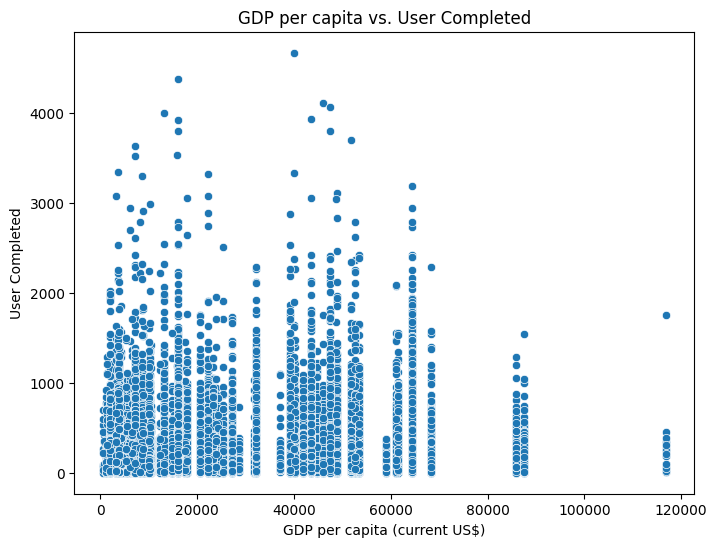

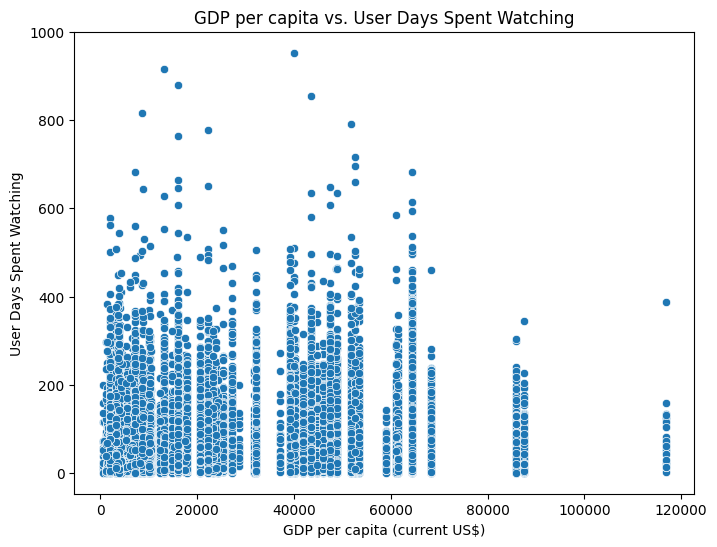

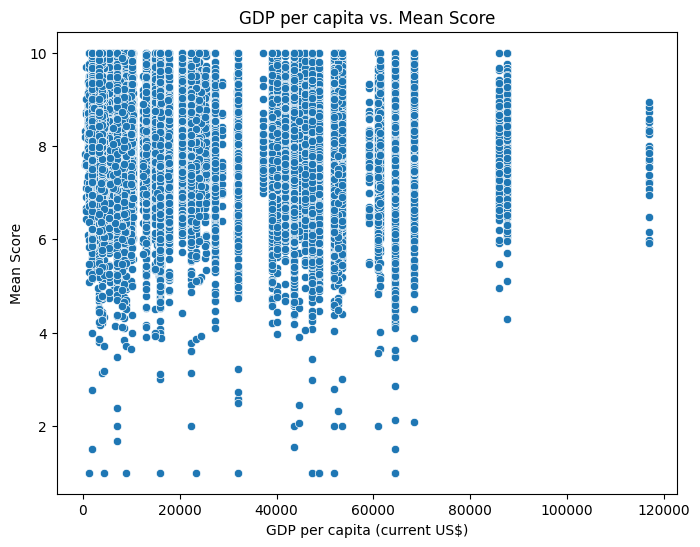

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='user_completed', data=final_df)
plt.title('GDP per capita vs. User Completed')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Completed')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='user_days_spent_watching', data=final_df)
plt.title('GDP per capita vs. User Days Spent Watching')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('User Days Spent Watching')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita (current US$)', y='stats_mean_score', data=final_df)
plt.title('GDP per capita vs. Mean Score')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Mean Score')
plt.show()

In [73]:
tmp = final_df.sample(n=100, random_state=42).copy()

tmp['gdp_category'] = pd.qcut(tmp['GDP per capita (current US$)'], 3, labels=['low', 'medium', 'high'])

tmp['completed_category'] = pd.qcut(tmp['user_completed'], 3, labels=['low', 'medium', 'high'])

tmp['days_spent_category'] = pd.qcut(tmp['user_days_spent_watching'], 3, labels=['low', 'medium', 'high'])

tmp['mean_score_category'] = pd.qcut(tmp['stats_mean_score'], 3, labels=['low', 'medium', 'high'])

In [74]:
contingency_table_completed = pd.crosstab(tmp['gdp_category'], tmp['completed_category'])

contingency_table_days_spent = pd.crosstab(tmp['gdp_category'], tmp['days_spent_category'])

contingency_table_mean_score = pd.crosstab(tmp['gdp_category'], tmp['mean_score_category'])

In [75]:
chi2_stat_completed, p_val_completed, dof_completed, expected_completed = chi2_contingency(contingency_table_completed)

chi2_stat_days_spent, p_val_days_spent, dof_days_spent, expected_days_spent = chi2_contingency(contingency_table_days_spent)

chi2_stat_mean_score, p_val_mean_score, dof_mean_score, expected_mean_score = chi2_contingency(contingency_table_mean_score)

print(f"Chi-square test for GDP and User Completed:")
print(f"Chi-square statistic: {chi2_stat_completed}")
print(f"P-value: {p_val_completed}")

print(f"\nChi-square test for GDP and User Days Spent Watching:")
print(f"Chi-square statistic: {chi2_stat_days_spent}")
print(f"P-value: {p_val_days_spent}")

print(f"\nChi-square test for GDP and Mean Score:")
print(f"Chi-square statistic: {chi2_stat_mean_score}")
print(f"P-value: {p_val_mean_score}")

Chi-square test for GDP and User Completed:
Chi-square statistic: 9.386488970588236
P-value: 0.05213263205024943

Chi-square test for GDP and User Days Spent Watching:
Chi-square statistic: 2.309283088235294
P-value: 0.6790794341947889

Chi-square test for GDP and Mean Score:
Chi-square statistic: 6.756288373935433
P-value: 0.14934155902854993


**Conclusion**: We fail to reject the null hypothesis and conclude that there is no significant association

**H3**: Anime engagement ('User Watching', 'User Completed', 'User Days Spent Watching') is positively correlated with national indicators of internet infrastructure, such as 'Fixed broadband subscriptions (per 100 people)' and 'Secure Internet servers (per 1 million people)'.